# Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
np.set_printoptions(suppress=True) # Avoid the number in exponent form
from sklearn.metrics.pairwise import euclidean_distances

### Read Data :

In [3]:
data = pd.read_csv("wine-clustering.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Visualization :

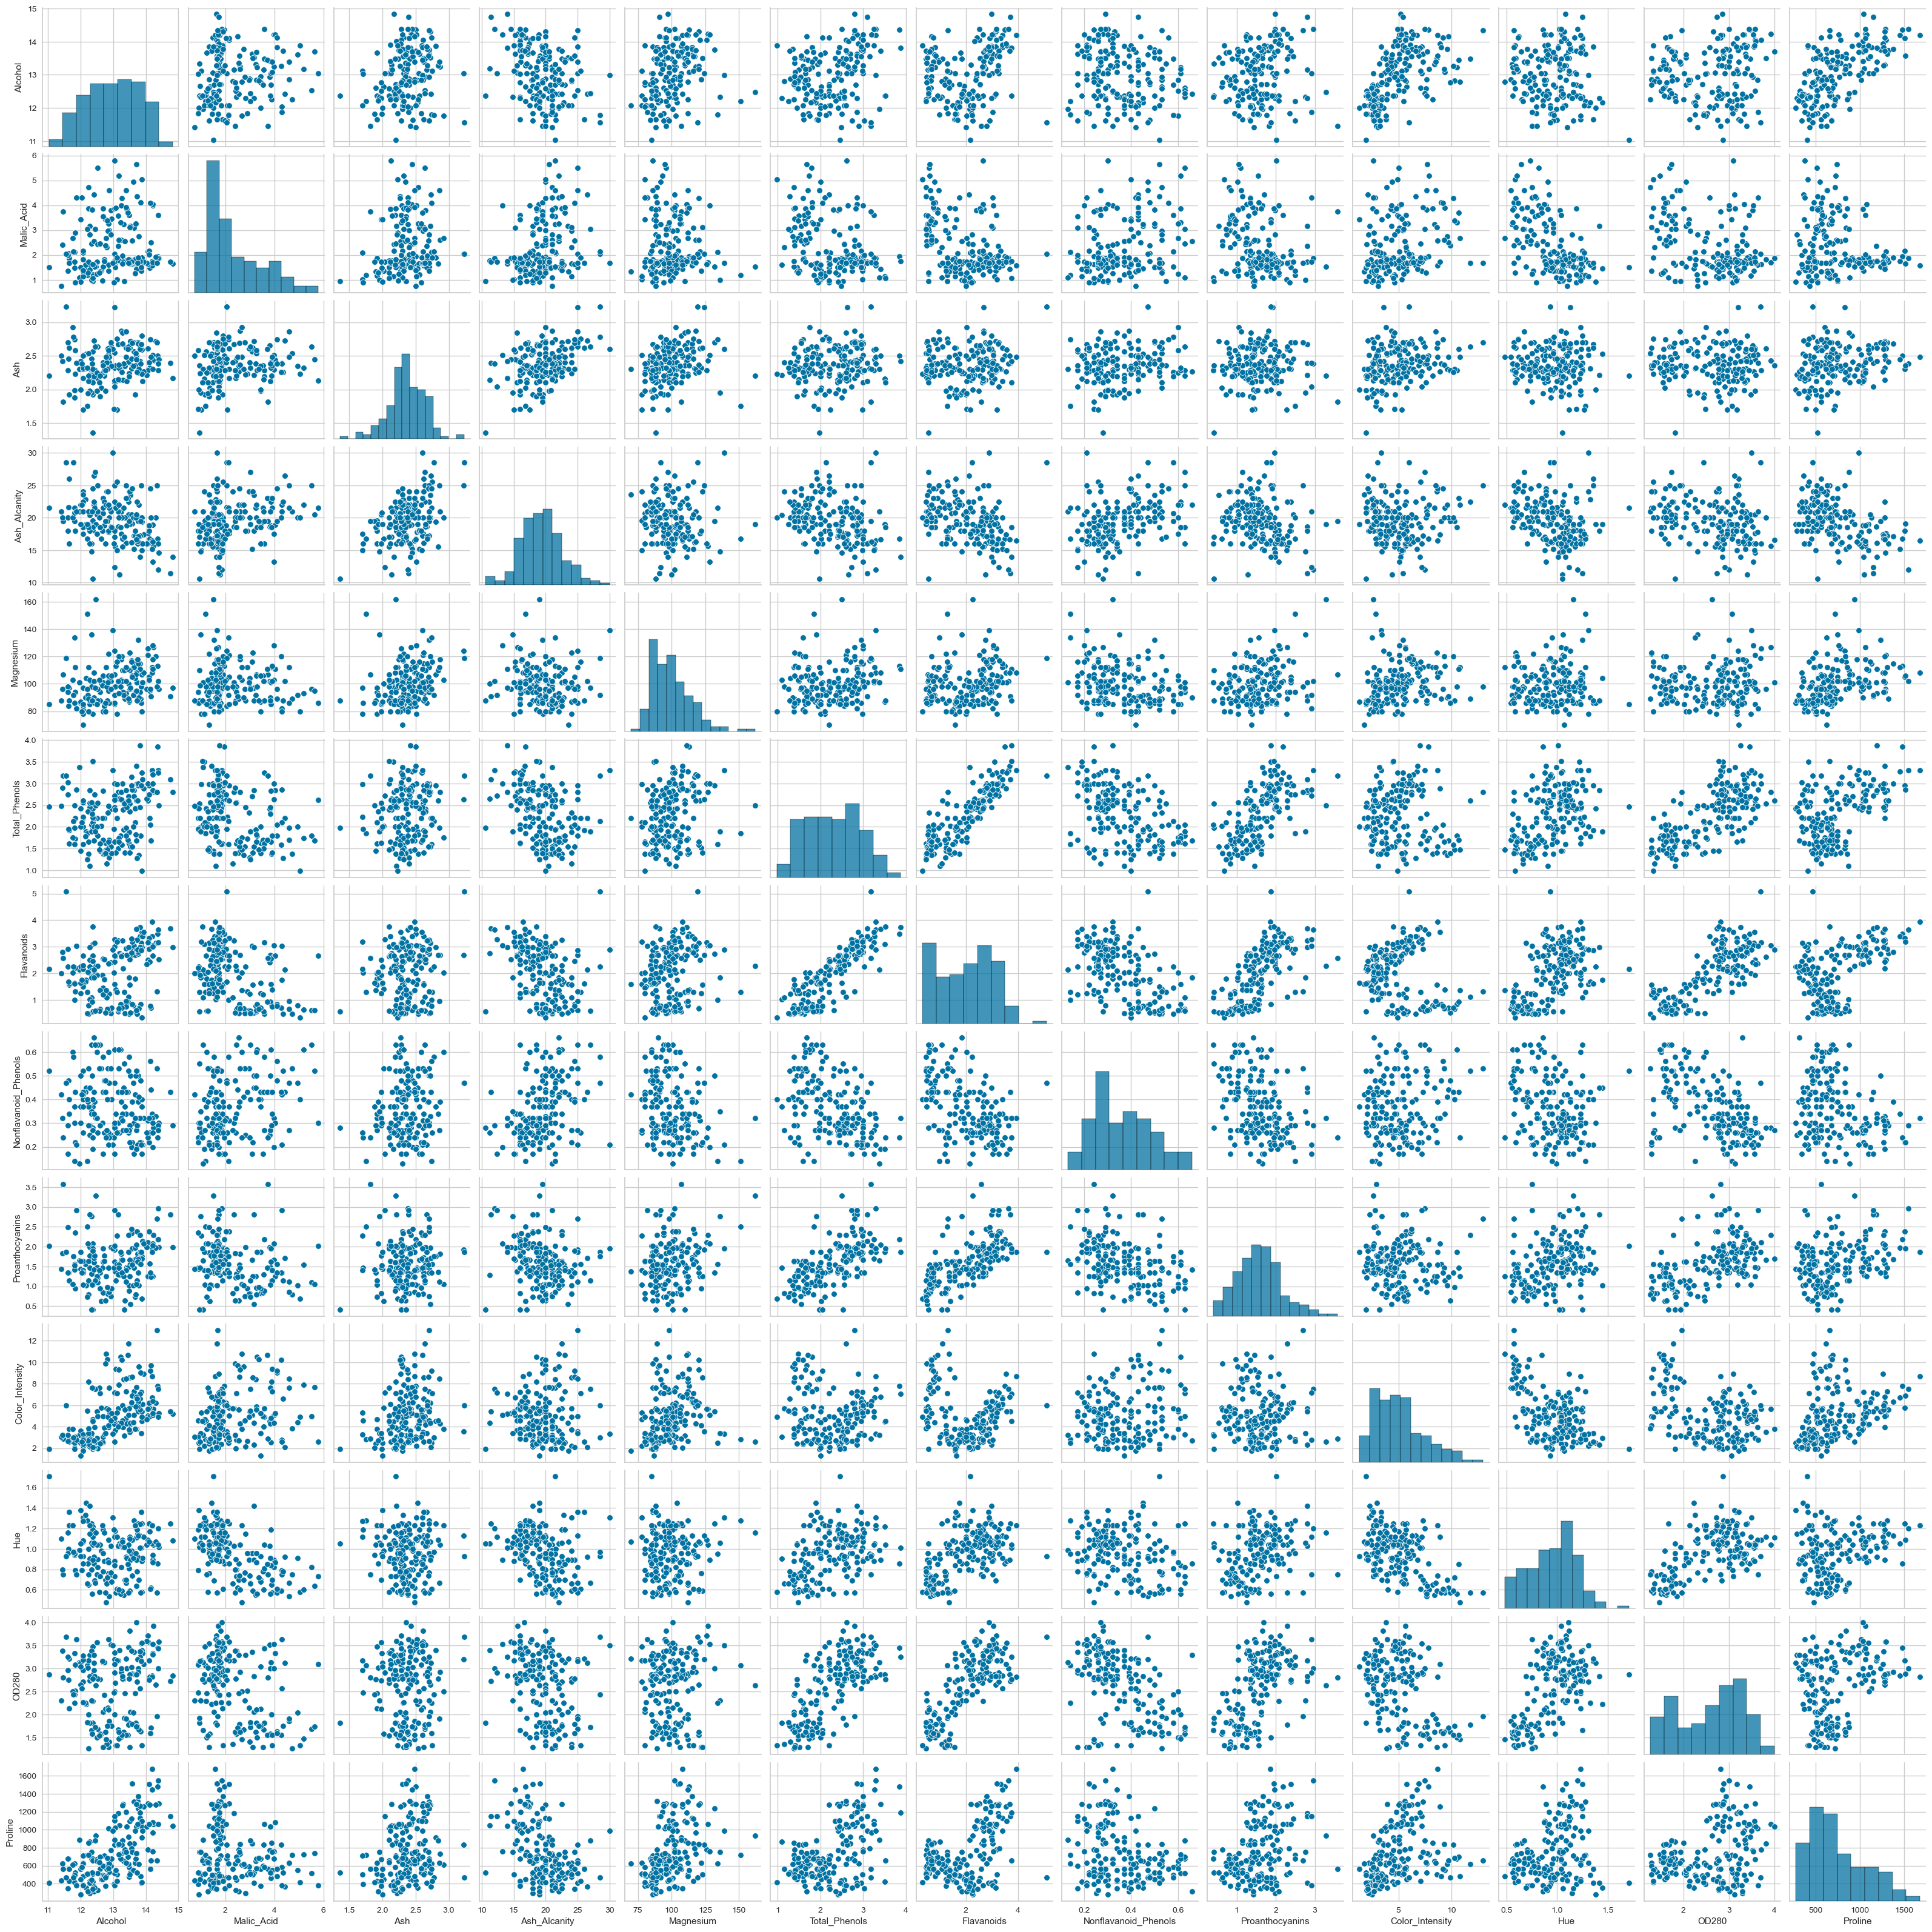

In [4]:
# Make A Pair plot
sns.pairplot(data)
plt.show()

###### I can not Specify the Cluster from this visualization due to complexity

# K-Means Clustering :

In [5]:
# For Applying the K-Means Clustering ,Firstly we Need to Scale the Data :
# scaling :
sc = StandardScaler()
data_c = sc.fit_transform(data)
data_c = pd.DataFrame(data_c,columns=data.columns)
data_c.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### To Identify the number of cluster(value of K): There are 2 Methods.
#### 1-Elbow Plot
#### 2-Silhouette Score  

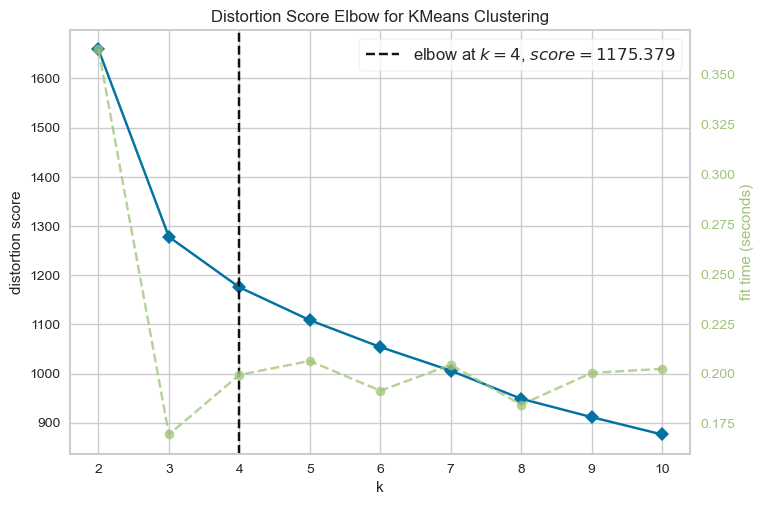

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
# Elbow Plot Make from the KElbowVisualizer,which is a YellowBrick Library Function 
K_elbow = KElbowVisualizer(KMeans(),k=10)
K_elbow.fit(data_c)
K_elbow.show()

**Inferences of Elbow Plot :**
* Here We Can See that Elbow Plot Gives us The Value Of K is 4.
* Thats means are Ideal Value of Cluster making is 4

#### Better way to Visualize the Silhouette Score is by YellowBrick :

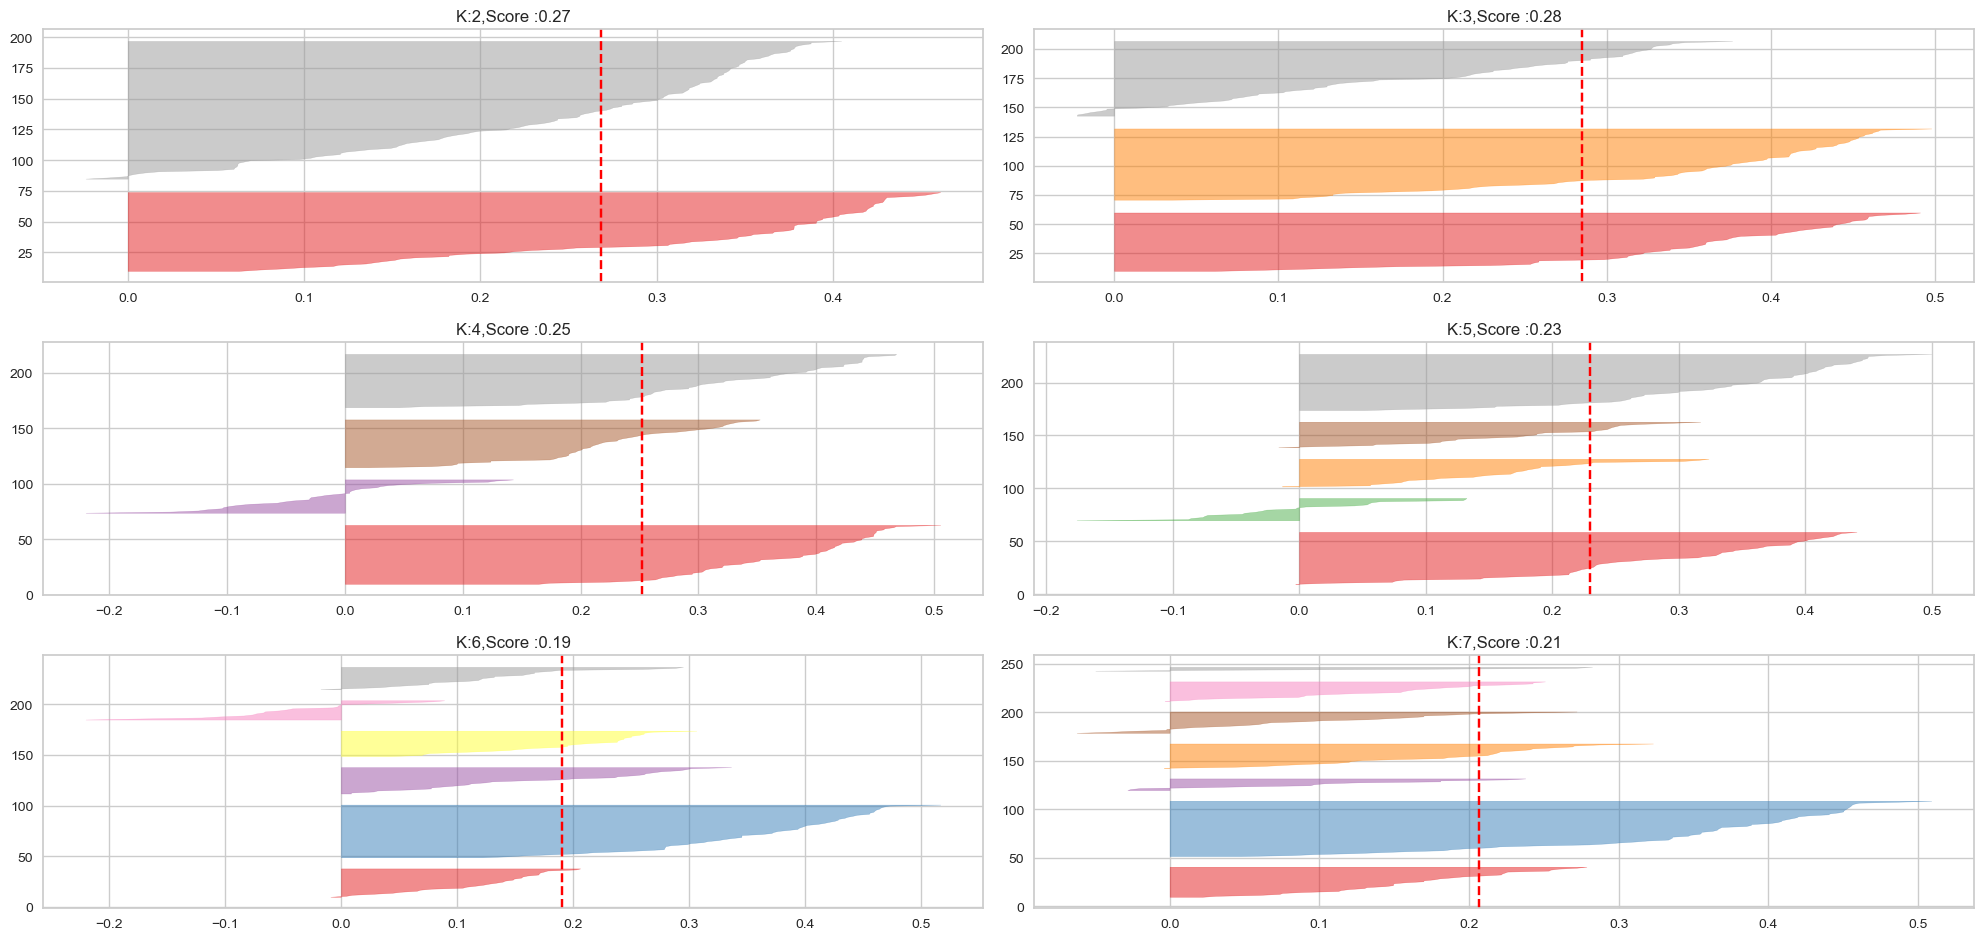

In [8]:
t = 1
plt.figure(figsize=(20,25))
for i in range(2,8,t):
    plt.subplot(8,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_c)
    plt.title(f"K:{i},Score :{np.round(sil_viz.silhouette_score_,2)}")
    t+=1
plt.tight_layout()
plt.show()

### we can go With K=3,Because at K=3 our Score is Maximum. 

In [7]:
# Here We are Applying Kmeans Cluster At 3.
final_Kmeans = KMeans(n_clusters=3)
data["Pred_Kmeans"] = final_Kmeans.fit_predict(data_c)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_Kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [8]:
data["Pred_Kmeans"].value_counts()

1    65
0    62
2    51
Name: Pred_Kmeans, dtype: int64

In [9]:
data.groupby(by="Pred_Kmeans").mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Pred_Kmeans,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


##### Take Flavanoids and Color Intensity on the basis of Significant Distance (There Columns Have Some significant Distance)
##### And Apply Clusters Using Hue

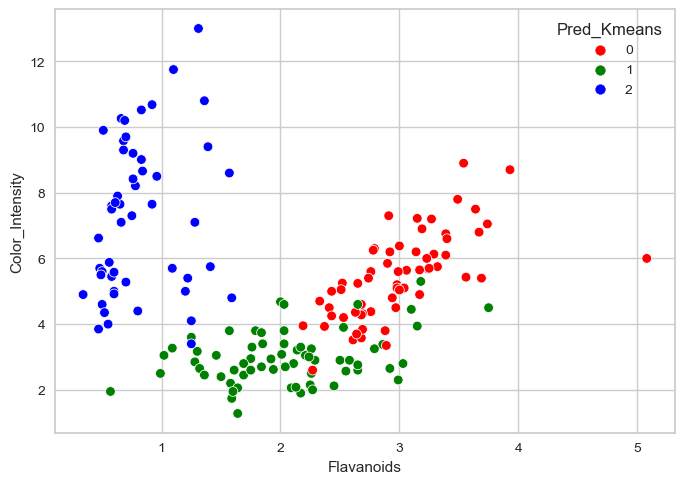

In [11]:
sns.scatterplot(x=data["Flavanoids"],y = data["Color_Intensity"],hue=data["Pred_Kmeans"],palette=["red","green","blue"]);

In [14]:
# Find Centrois of the Final Kmeans Cluster.
centroids = final_Kmeans.cluster_centers_
centroids

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

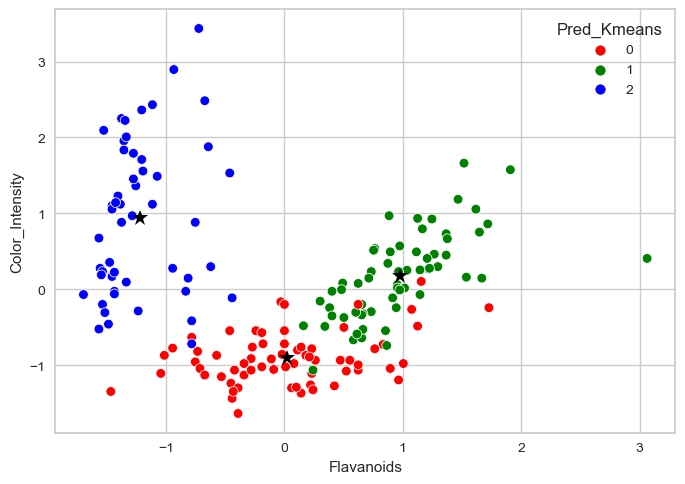

In [15]:
# Make An Scatter Plot :
sns.scatterplot(x=data_c["Flavanoids"],y = data_c["Color_Intensity"],hue=data["Pred_Kmeans"],palette=["red","green","blue"]);
for i in range(3):
    plt.plot(centroids[i][6],centroids[i][9],color="black",marker="*",ms=12)

# Agglomerative Clustering :

In [16]:
# lets create a linkage matrix
link_mat_complete=linkage(data_c,method="complete")

In [17]:
link_mat_complete.shape

(177, 4)

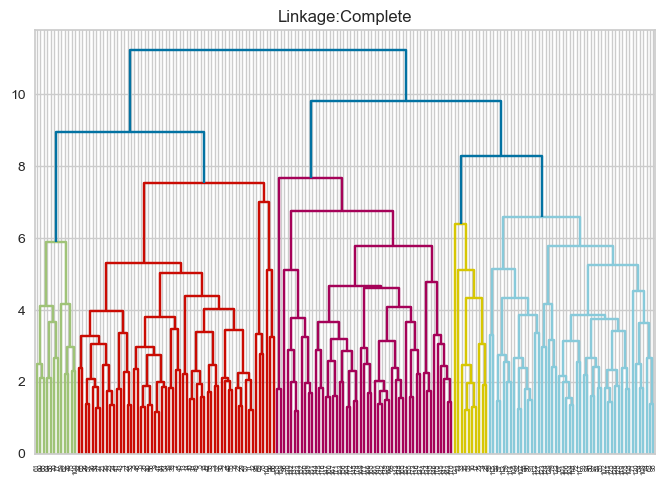

In [18]:
# lets create a dendogram:
plt.title("Linkage:Complete")
dendrogram(link_mat_complete)
plt.show()

In [19]:
# lets create a linkage matrix for Single Method
link_mat_single=linkage(data_c,method="single")

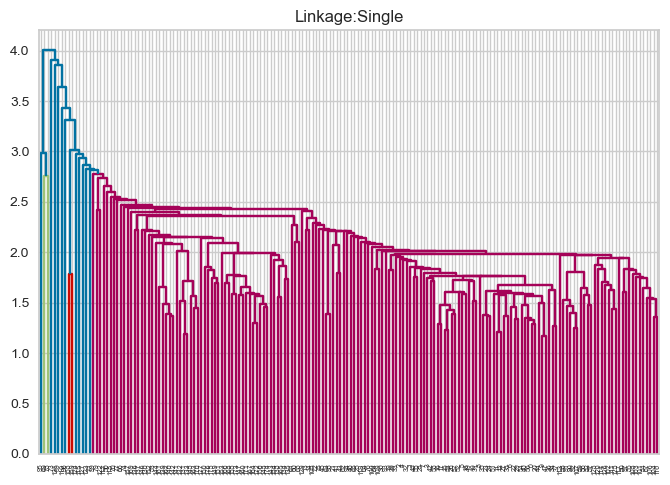

In [20]:
# lets create a dendogram:
plt.title("Linkage:Single")
dendrogram(link_mat_single)
plt.show()

In [21]:
# lets create a linkage matrix for Ward Method
link_mat_ward=linkage(data_c,method="ward")

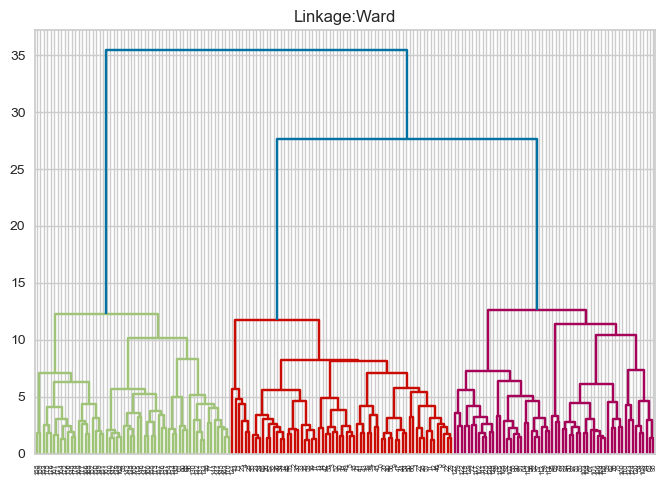

In [22]:
# lets create a dendogram:
plt.title("Linkage:Ward")
dendrogram(link_mat_ward)
plt.show()

In [23]:
for i in [3,4]:
    model = AgglomerativeClustering(n_clusters=i,linkage="ward")
    pred = model.fit_predict(data_c)
    print("K =",i,":",silhouette_score(data_c,pred))

K = 3 : 0.2774439826952265
K = 4 : 0.225836659334758


**We Can See that At**
* K=3 our Silhouette Score is 0.2774439826952265
* and At
* K=4 our Silhouette Score is 0.225836659334758
* So We can Go With K = 3 Because the Silhouette Score at k=3 is Greater.

In [12]:
# Apply Agglomerative Clustering :
agglo_final = AgglomerativeClustering(n_clusters=3)
agglo_final

AgglomerativeClustering(n_clusters=3)

In [13]:
data["agglo_pred"] = agglo_final.fit_predict(data_c)

In [14]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_Kmeans,agglo_pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


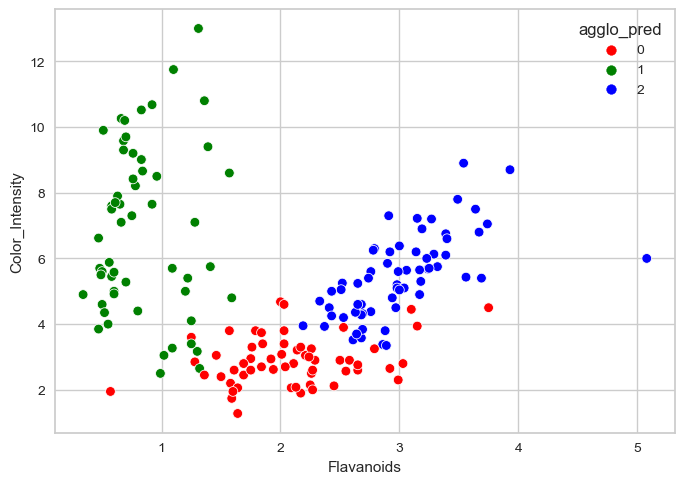

In [15]:
# MAke a Scatter plot :
sns.scatterplot(x=data["Flavanoids"],y=data["Color_Intensity"],
                hue=data["agglo_pred"],palette=["red","green","blue","orange","magenta"])
plt.show()

In [28]:
# cophenetic Correlation coeff
# it is the correlation btw cophenetic distance(Dendogram Distance) and the actual distance
dist_matirx = euclidean_distances(data_c)
dist_matirx.shape

(178, 178)

In [29]:
actual_distance = dist_matirx[np.triu_indices(178,k=1)]
print(actual_distance.shape)
actual_distance[:5]

(15753,)


array([3.49753522, 3.02660794, 2.84250465, 3.56685389, 2.52528988])

In [30]:
# Cophenetic Distance comes from dendogram:
# lets calculate
ccc,cophenetic_dist = cophenet(link_mat_ward,actual_distance)
cophenetic_dist

array([5.79587289, 8.25339098, 8.13738468, ..., 1.82621785, 6.26474402,
       6.26474402])

In [31]:
np.corrcoef(actual_distance,cophenetic_dist)

array([[1.        , 0.66234872],
       [0.66234872, 1.        ]])

### THANK YOU